<a href="https://colab.research.google.com/github/dominikjagoda/my-first/blob/main/DeepLearningIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [23]:
#Preparing the data

mean = X_train.mean(axis=0)
X_train_n = X_train - mean
std = X_train_n.std(axis=0)
X_train /= std

X_test_n = X_test - mean
X_test_n /= std

meany = y_train.mean(axis=0)
y_train_n = y_train - meany
stdy = y_train_n.std(axis=0)
y_train /= stdy

y_test_n = y_test - meany
y_test_n /= stdy


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# first we fit the scaler on the training dataset
scaler.fit(X_train_n)

# then we call the transform method to scale both the training and testing data
X_train_scaled = scaler.transform(X_train_n)
X_test_scaled = scaler.transform(X_test_n)



In [38]:
#Define, compile and train neural network
from keras import layers

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.compile(optimizer='rmsprop',
                       loss='mse',
                       metrics=['mae'])


In [39]:
history = model.fit(X_train_scaled, y_train_n, validation_split=0.2, epochs=150)

Epoch 1/150
11/11 [==============================] - 0s 11ms/step - loss: 1.2366 - mae: 0.7899 - val_loss: 1.1137 - val_mae: 0.7240
Epoch 2/150
11/11 [==============================] - 0s 3ms/step - loss: 0.9330 - mae: 0.6733 - val_loss: 0.8779 - val_mae: 0.6517
Epoch 3/150
11/11 [==============================] - 0s 3ms/step - loss: 0.7738 - mae: 0.6175 - val_loss: 0.7560 - val_mae: 0.6140
Epoch 4/150
11/11 [==============================] - 0s 3ms/step - loss: 0.6844 - mae: 0.5847 - val_loss: 0.6988 - val_mae: 0.5938
Epoch 5/150
11/11 [==============================] - 0s 3ms/step - loss: 0.6235 - mae: 0.5532 - val_loss: 0.6330 - val_mae: 0.5688
Epoch 6/150
11/11 [==============================] - 0s 3ms/step - loss: 0.5752 - mae: 0.5324 - val_loss: 0.5878 - val_mae: 0.5453
Epoch 7/150
11/11 [==============================] - 0s 3ms/step - loss: 0.5292 - mae: 0.5092 - val_loss: 0.5388 - val_mae: 0.5191
Epoch 8/150
11/11 [==============================] - 0s 3ms/step - loss: 0.4898 - 

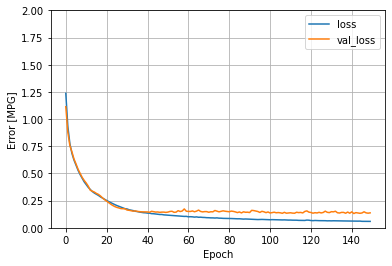

In [40]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [41]:
results = model.evaluate(X_test_n, y_test_n)

print('loss test data: ', results[0])
print('mse test data: ', results[1])

results = model.evaluate(X_train_n, y_train_n)

print('loss train data: ', results[0])
print('mse train data: ', results[1])

4/4 [==============================] - 0s 2ms/step - loss: 6512.8164 - mae: 69.6280
loss test data:  6512.81640625
mse test data:  69.62800598144531
13/13 [==============================] - 0s 1ms/step - loss: 0.0730 - mae: 0.1869
loss train data:  0.07302302122116089
mse train data:  0.18685299158096313
